ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.5 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.5 kB 325.1 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.5 kB 325.1 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.5 kB 325.1 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.5 kB 325.1 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.5 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 57.5/57.5 kB 17

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Shruti Ghoniya\anaconda\envs\pytorch\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Shruti Ghoniya\anaconda\envs\pytorch\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shruti Ghoniya\anaconda\envs\pytorch\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shruti Ghoniya\anaconda\envs\pytorch\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shruti Ghoniya\anaconda\envs\pytorch\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Shruti Gho

     -------- ------------------------------- 0.9/4.2 MB 233.9 kB/s eta 0:00:15
     --------- ------------------------------ 1.0/4.2 MB 236.2 kB/s eta 0:00:14
     --------- ------------------------------ 1.0/4.2 MB 240.1 kB/s eta 0:00:14
     --------- ------------------------------ 1.0/4.2 MB 240.1 kB/s eta 0:00:14
     --------- ------------------------------ 1.0/4.2 MB 239.0 kB/s eta 0:00:14
     --------- ------------------------------ 1.0/4.2 MB 241.2 kB/s eta 0:00:14
     --------- ------------------------------ 1.0/4.2 MB 241.2 kB/s eta 0:00:14
     --------- ------------------------------ 1.0/4.2 MB 240.7 kB/s eta 0:00:14
     ---------- ----------------------------- 1.1/4.2 MB 242.8 kB/s eta 0:00:14
     ---------- ----------------------------- 1.1/4.2 MB 243.4 kB/s eta 0:00:13
     ---------- ----------------------------- 1.1/4.2 MB 244.6 kB/s eta 0:00:13
     ---------- ----------------------------- 1.1/4.2 MB 244.6 kB/s eta 0:00:13
     ---------- ------------------------

In [1]:
import sys, os
import math
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage


In [2]:
def psnr(target, ref):
    # Assume target is RGB/BGR image
    target_data = target.astype(np.float32)
    ref_data = ref.astype(np.float32)
    
    diff = ref_data - target_data
    diff = diff.flatten('C')
    
    rmse = np.sqrt(np.mean(diff ** 2.))
    
    return 20 * np.log10(255. / rmse)

In [3]:
def mse(target, ref):
    target_data = target.astype(np.float32)
    ref_data = ref.astype(np.float32)
    err = np.sum((target_data - ref_data) ** 2)
    
    err /= float(target_data.shape[0] * target_data.shape[1])
    return err


In [4]:
from skimage.metrics import structural_similarity as ssim

In [5]:
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel=True))
    return scores

In [6]:
def prepare_images(path, factor):
    # Loop through the files in the directory
    for file in os.listdir(path):
        image = cv2.imread(path + '/' + file)
        
        # Find old and new image dimensions
        h, w, c = image.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        
        # Resize down the image
        image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
        
        # Resize up the image
        image = cv2.resize(image, (w, h), interpolation=cv2.INTER_LINEAR)
        
        # Save the image
        try:
            os.listdir(path + '/../../resized')
        except:
            os.mkdir(path + '/../../resized')
            
        cv2.imwrite(path + '/../../resized/{}'.format(file), image)

In [7]:
prepare_images (r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset/Test/Set14', 2)

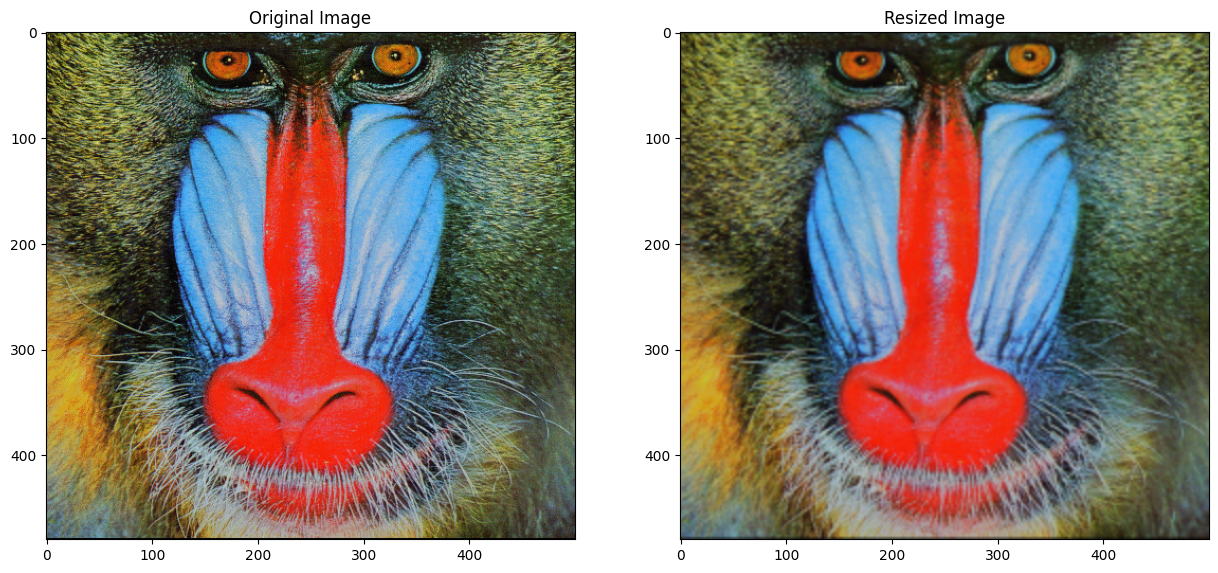

In [8]:
from PIL import Image
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(Image.open(r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset/Test/Set14/baboon.bmp'))
ax[0].title.set_text('Original Image')
ax[1].imshow(Image.open(r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset/resized/baboon.bmp'))
ax[1].title.set_text('Resized Image')
plt.show()

In [9]:
target_path = r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset/Test/Set14/barbara.bmp'
ref_path = r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset/resized/barbara.bmp'
target = cv2.imread(target_path)
ref = cv2.imread(ref_path)
print("Target image shape:", target.shape)
print("Reference image shape:", ref.shape)


Target image shape: (576, 720, 3)
Reference image shape: (576, 720, 3)


In [10]:
# Build train dataset
import h5py

names = sorted(os.listdir(r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset\Train'))

data = []
label = []

for name in names:
    fpath = os.path.join(r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset\Train', name)
    hr_img = cv2.imread(fpath, cv2.IMREAD_COLOR)
    hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
    hr_img = hr_img[:, :, 0]
    shape = hr_img.shape
    
    # resize operation to produce training data and labels
    shape = hr_img.shape
    lr_img = cv2.resize(hr_img, (int(shape[1] / 2), int(shape[0] / 2)))
    lr_img = cv2.resize(lr_img, (shape[1], shape[0]))
    
    width_range = int((shape[0] - 16 * 2) / 16)
    height_range = int((shape[1] - 16 * 2) / 16)
    
    for k in range(width_range):
        for j in range(height_range):
            x = k * 16
            y = j * 16
            
            hr_patch = hr_img[x: x + 32, y: y + 32]
            lr_patch = lr_img[x: x + 32, y: y + 32]
            
            hr_patch = hr_patch.astype(np.float32) / 255.
            lr_patch = lr_patch.astype(np.float32) / 255.
            
            hr = np.zeros((1, 20, 20), dtype=np.double)
            lr = np.zeros((1, 32, 32), dtype=np.double)
            
            hr[0, :, :] = hr_patch[6:-6, 6: -6]
            lr[0, :, :] = lr_patch
            
            label.append(hr)
            data.append(lr)

data = np.array(data, dtype=np.float32)
label = np.array(label, dtype=np.float32)

In [11]:
print("Image File Path:", fpath)

Image File Path: C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset\Train\tt9.bmp


In [12]:
with h5py.File('train.h5', 'w') as h:
    h.create_dataset('data', data=data, shape=data.shape)
    h.create_dataset('label', data=label, shape=label.shape)


In [13]:
names = sorted(os.listdir(r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset\Test\Set14'))
nums = len(names)

data_test = np.zeros((nums * 30, 1, 32, 32), dtype=np.double)
label_test = np.zeros((nums * 30, 1, 20, 20), dtype=np.double)

for i, name in enumerate(names):
    fpath = os.path.join(r'C:\Users\Shruti Ghoniya\Documents\SRCNN_dataset\Test\Set14', name)
    hr_img = cv2.imread(fpath, cv2.IMREAD_COLOR)
    hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
    hr_img = hr_img[:, :, 0]
    shape = hr_img.shape
    
    # resize operation to produce training data and labels
    lr_img = cv2.resize(hr_img, (int(shape[1] / 2), int(shape[0] / 2)))
    lr_img = cv2.resize(lr_img, (shape[1], shape[0]))
    
    # Produce random crop
    x = np.random.randint(0, min(shape[0], shape[1]) - 32, 30)
    y = np.random.randint(0, min(shape[0], shape[1]) - 32, 30)
    
    for j in range(30):
        lr_patch = lr_img[x[j]:x[j] + 32, y[j]:y[j] + 32]
        hr_patch = hr_img[x[j]:x[j] + 32, y[j]:y[j] + 32]
        
        lr_patch = lr_patch.astype(np.float32) / 255.
        hr_patch = hr_patch.astype(np.float32) / 255.
        
        data_test[i * 30 + j, 0, :, :] = lr_patch
        label_test[i * 30 + j, 0, :, :] = hr_patch[6: -6, 6: -6]

In [14]:
with h5py.File('test.h5', 'w') as h:
    h.create_dataset('data', data=data_test, shape=data_test.shape)
    h.create_dataset('label', data=label_test, shape=label_test.shape)

In [15]:
def model():
    SRCNN = tf.keras.Sequential(name='SRCNN')
    SRCNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(9, 9), 
                                     padding='VALID',
                                     use_bias=True,
                                     input_shape=(None, None, 1),
                                     kernel_initializer='glorot_uniform',
                                     activation='relu'))
    SRCNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                     padding='SAME',
                                     use_bias=True,
                                     kernel_initializer='glorot_uniform',
                                     activation='relu'))
    SRCNN.add(tf.keras.layers.Conv2D(filters=1, kernel_size=(5, 5),
                                     padding='VALID',
                                     use_bias=True,
                                     kernel_initializer='glorot_uniform',
                                     activation='linear'))
    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
    
    # Compile model
    SRCNN.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

In [16]:
srcnn_model = model()
srcnn_model.summary()

Model: "SRCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 128)   10496     
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    73792     
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 1)     1601      
                                                                 
Total params: 85889 (335.50 KB)
Trainable params: 85889 (335.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
with h5py.File('./train.h5', 'r') as h:
    data = np.array(h.get('data'))
    label = np.array(h.get('label'))
    X_train = np.transpose(data, (0, 2, 3, 1))
    y_train = np.transpose(label, (0, 2, 3, 1))
    
with h5py.File('./test.h5', 'r') as h:
    data = np.array(h.get('data'))
    label = np.array(h.get('label'))
    X_test = np.transpose(data, (0, 2, 3, 1))
    y_test = np.transpose(label, (0, 2, 3, 1))
    
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14901, 32, 32, 1), (14901, 20, 20, 1), (420, 32, 32, 1), (420, 20, 20, 1))

In [18]:
checkpoint_path = './srcnn/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir, save_best_only=True,
                                                 save_weights_only=True, verbose=0)

In [ ]:
import keras

# Custom callback to print epoch number
class EpochNumberCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch {}/{}".format(epoch + 1, self.params['epochs']))

# Create an instance of the custom callback
epoch_number_callback = EpochNumberCallback()

# Train the model with the custom callback
srcnn_model.fit(
    X_train, y_train,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[epoch_number_callback, checkpoint],  # Add the custom callback
    shuffle=True,
    epochs=200,
    verbose=False
)

